<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/CURSO_IBM_DATA_ANALYSIS/IBMDataAnalPythonMod4MODELDEVELOP_DanielHdezM_A01793538.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CURSO IBM DATA ANALYSIS WITH PYTHON**

**MODULO 4: MODEL DEVELOPMENT**

**MATERIA : CIENCIA DE DATOS**

**ALUMNO : DANIEL HERNANDEZ MORA**

**MATRICULA : A01793538**

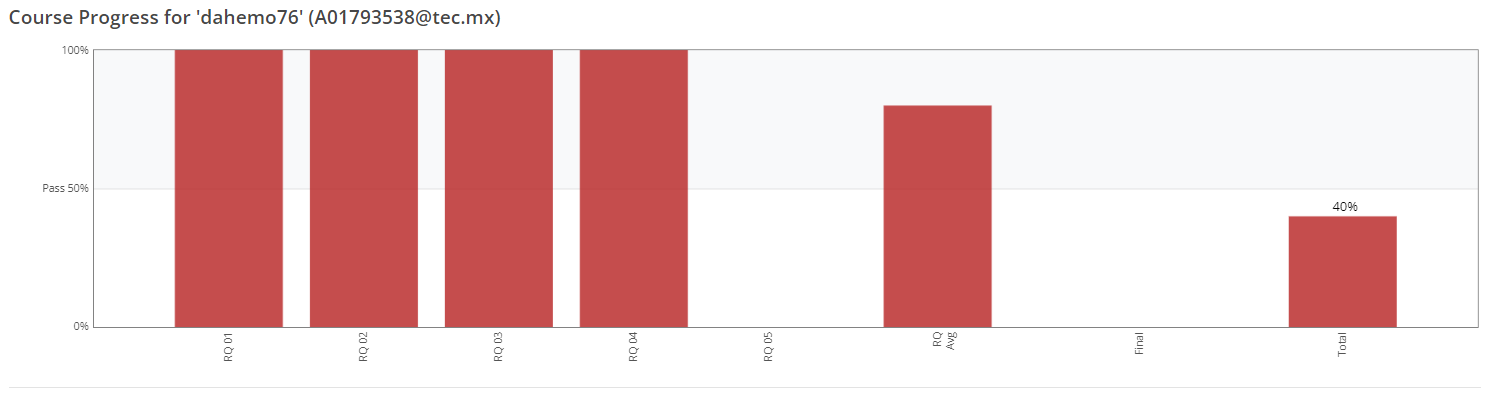

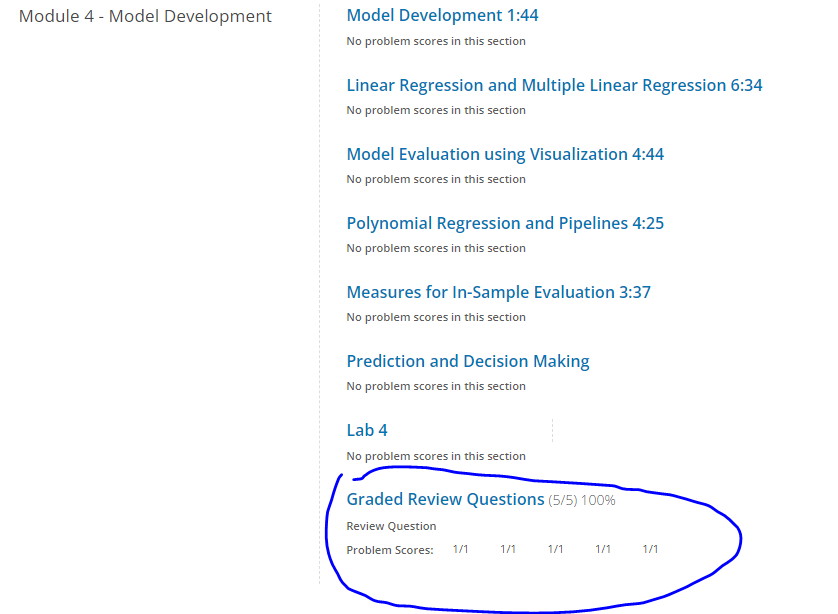

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

En las siguientes líneas, importaremos la base datos de un archivo CSV

In [3]:
filename = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [4]:
df = pd.read_csv(filename)

Revisamos que hayamos correctamente y asignado el dataframe a la variable df

In [5]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


**REGRESION LINEAL Y REGRESION LINEAL MULTIPLE**

**REGRESION LINEAL SIMPLE**

La regresion lineal simple es un método para ayudarnos a entender la relacion entre dos variables:

* La variable X , la cual es el predictor o la variable independiente
* La variable Y o variable Independiente, la cual es aquella que queremos predecir

  >  Y: RESPONSE VARIABLE

  >  X: PREDICTOR VARIABLE

FUNCIONES LINEALES

Estan expresadas por la funciones lineas de tipo Yhat = a + bX

Donde a es el **intercepto** de la regresion lineal, es decir el valor de Yhat cuando X es 0.

Adicionalmente tenemos la **pendiente** de la regresión lineal, el cual es el valor con el cual Y aumenta cuando X aumenta en 1 unidad.

En las siguientes lineas, usatemos funciones de Sklearn para mostrar como funciona la regresión lineal en Python

In [6]:
# Importamos la función de regresión Lineal
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression()
lm

LinearRegression()

Aqui definimos que la variable "highway-mpg" será nuestro X o predictor, resultando "price" nuestro variable de respuesta o predicta

In [8]:
X = df[['highway-mpg']]
Y = df['price']

In [9]:
lm.fit(X,Y)

LinearRegression()

Aqui veremos los primeros 5 resultados  de la regresión lineal ( valores predichos)

In [10]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Ahora veremos el valor del intercepto y de la pendiente de la ecuación, resultando esta como Yhat = 3823.30 -821.73(Highway-mpg)

In [11]:
lm.intercept_

38423.3058581574

In [12]:
lm.coef_

array([-821.73337832])

Realizaremos el mismo ejercicio pero ahora utilizando "engine-size" como variable independiente y "price" como variable dependiente

In [13]:
lm1 = LinearRegression()
lm1.fit(df[['engine-size']], df[['price']])


LinearRegression()

In [14]:
lm1.coef_

array([[166.86001569]])

In [15]:
lm1.intercept_

array([-7963.33890628])

La ecuación entonces queda como se muestra a continuación:

In [16]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

**REGRESION LINEAL MULTIPLE**

Utilizamos regresión lineal múltiple cuando queremos predecir el valor de Y a partir de multiples variables. En los casos practicos normalmente se utiliza esta herramienta ya que se quiere un modelo predictor a partir de multiples variables independientes:
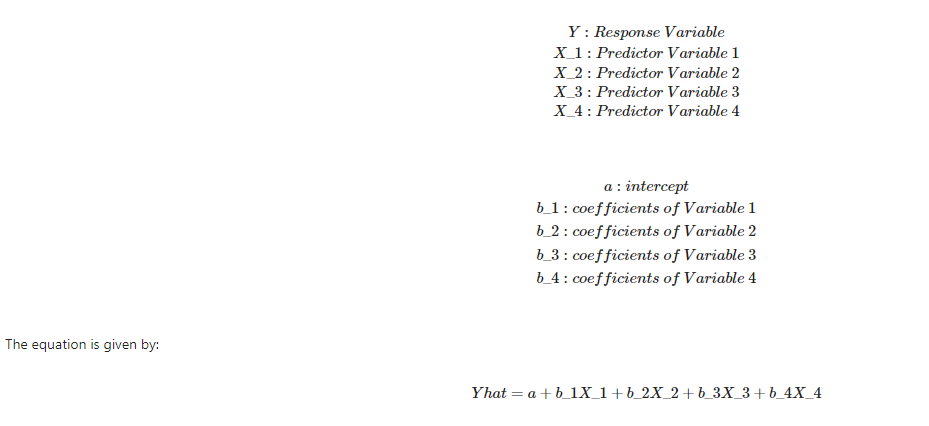



Vamos a hacer un ejercion de regresión lineal múltiple empleando las siguientes variables: Horsepower, Curb-weigth, Engine-size, Highway-mpg

In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
lm.fit(Z, df['price'])

LinearRegression()

In [19]:
lm.intercept_

-15806.62462632922

In [20]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

La ecuación resultante es: 

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

Ahora realizaremos un ejercicio de regresión lineal múltiple empleando las variables de normalized-loss y highway-mpg

In [21]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [22]:
lm2.intercept_

38201.31327245728

In [23]:
lm2.coef_

array([   1.49789586, -820.45434016])

La ecuación entonces es la sigueinte:

Price = 38201.31 + 1.49(normalized_losses) - 820.45(highway-mpg)

**EVALUACION DEL MODELO UTILIZANDO VISUALIZACION**

En la siguiente sección usaremos alguna herramientas del paquete de seaborn para visualizar graficamente el comportamiento del modelo predictivo

In [24]:
import seaborn as sns
%matplotlib inline 

**Graficas de Regresion**

Nos da un buen idea de la relacion entre dos variables, y es una buena herramienta cuando se utiliza regresión linea simple

A continuacion ejecutaremos dos ejemplos, uno que muestra la relacion entre precio y la variable "highway-mpg" y la otra la relación entre "peak-rpm" y precio

(0.0, 48173.85459458543)

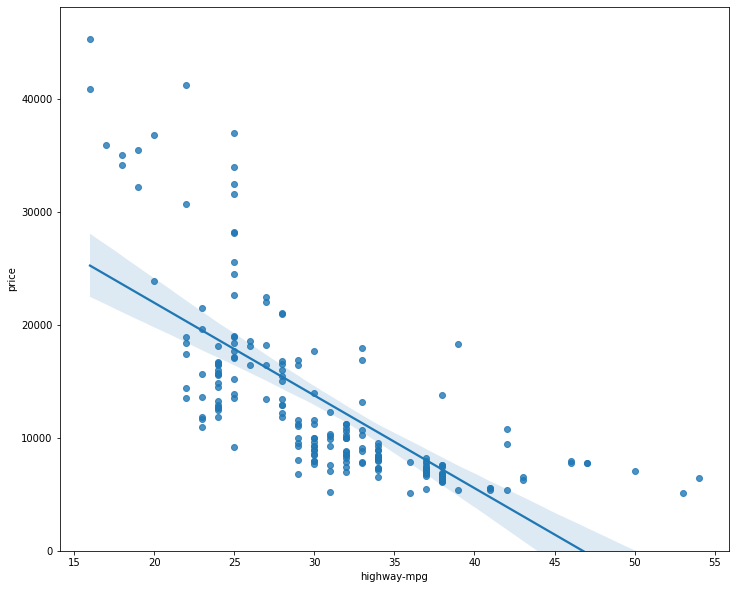

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

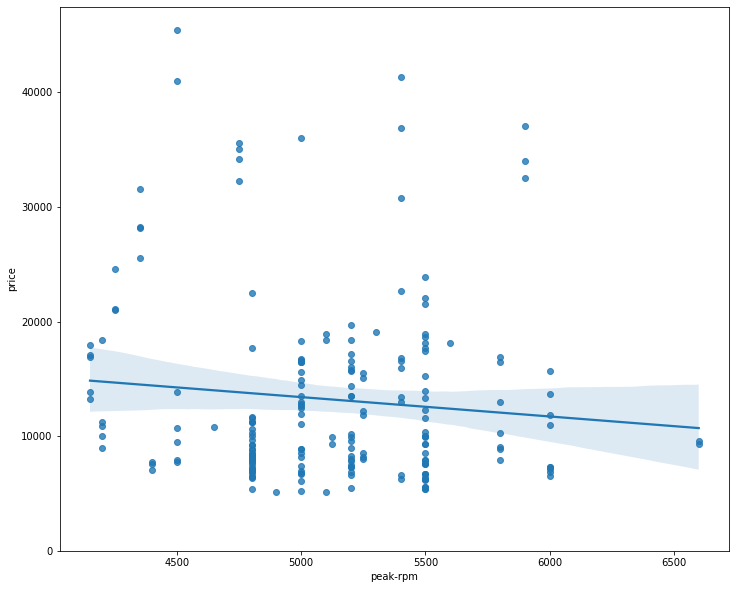

In [26]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Como podmemos ver en la graficas ambas tienen relaión, por lo que se puede ver es negativa y la relacion entre "highway-mpg" y el precio es mucho mas fuerte

A continuación veremos la correlacion que hay entre las dos variables y el precio como podremos ver, hay mucha dispersion en los grafica de peak-rpm vs price

El valor  de correlacion para peak-rpm vs price es de -0.10 y para "highway-mpg" vs Price es de -0.70 reafirmando que hay una fuerte relacion entre ellas.

In [27]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


**GRAFICA DE RESIDUOS**

¿Qué es un residual?

La diferencia entre el valor observado (y) y el valor pronosticado (Yhat) se llama residual (e).

Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

¿qué es un gráfico residual?

Una gráfica de residuos es un gráfico que muestra los residuos en el eje y vertical y la variable independiente en el eje x horizontal.

¿A qué prestamos atención cuando miramos una parcela residual?

Nos fijamos en la dispersión de los residuos:

- Si los puntos en una gráfica de residuos se distribuyen aleatoriamente alrededor del eje x, entonces un modelo lineal es apropiado para los datos.

¿Porqué es eso? La distribución aleatoria de residuos significa que la varianza es constante y, por lo tanto, el modelo lineal se ajusta bien a estos datos.

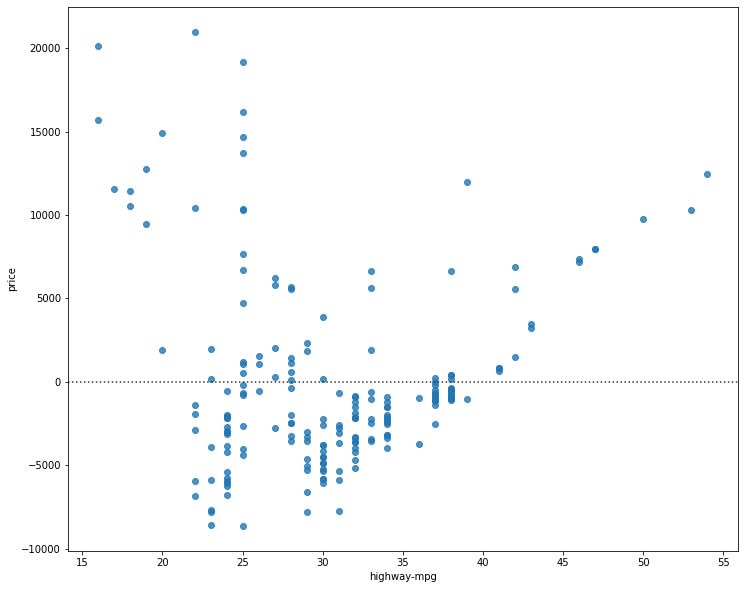

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

**REGRESION LINEAL MULTPIPLE**

¿Cómo visualizamos un modelo de regresión lineal múltiple?

 Esto se vuelve un poco más complicado porque no se puede visualizar con regresión o gráfico residual.

Una forma de ver el ajuste del modelo es mirar el gráfico de distribución. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

In [29]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


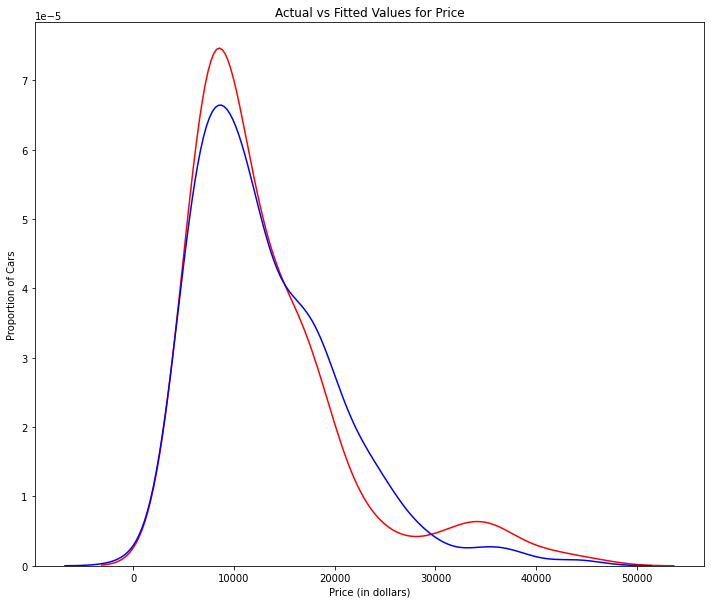

In [30]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Podemos ver que los valores ajustados están razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Lo anterior es inidcativo  que se debe mejorar el modelo

**REGRESION POLINOMIAL Y PIPELINES**

La regresión polinomial es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.

Hay diferentes órdenes de regresión polinomial:

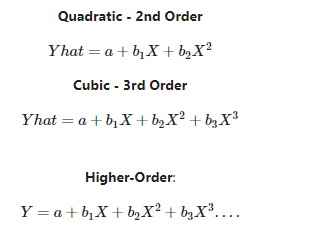

A continuacipon ejecutaremos unos ejemplos usando regresion lineal multiple de grado 3

In [31]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [32]:
x = df['highway-mpg']
y = df['price']

Ajustemos el polinomio usando la función polyfit, luego usemos la función poly1d para mostrar la función polinomial.

In [33]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Ahora vamos a graficar la función polinomial

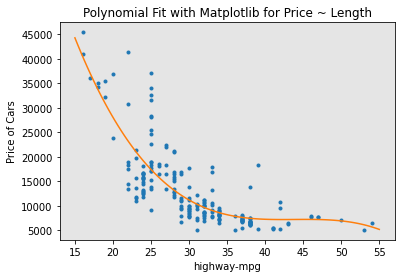

In [34]:
PlotPolly(p, x, y, 'highway-mpg')

Podemos ver en el gráfico que este modelo polinomial funciona mejor que el modelo lineal. Esto se debe a que la función polinomial generada se asemeja mas al comportamiento de los datos

In [35]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Ahora haremos un ejercicio con los mismos datos, pero usando un polinomio de orden 11

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


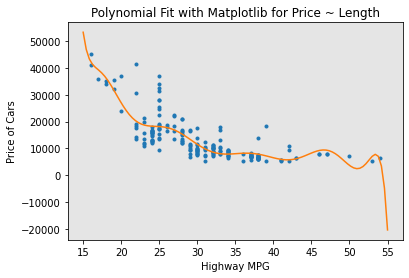

In [36]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

**Pipeline**

Las pipelines de datos simplifican los pasos para procesar los datos. Usamos el módulo Pipeline para crear un pipeline.
También usamos StandardScaler como un paso en nuestro pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [38]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [39]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Primero, convertimos el tipo de datos Z al tipo flotante para evitar las advertencias de conversión que pueden aparecer como resultado de que StandardScaler tome entradas flotantes.

In [40]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [41]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Creamo entonces un pipiline que estandarice los datos, luego produzca una predicción usando un modelo de regresión lineal usando las características Z y el objetivo Y.

In [42]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

**Medidas para la evaluación dentro de la muestra**

Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan preciso es el modelo.

Dos medidas muy importantes que se utilizan a menudo en Estadística para determinar la precisión de un modelo son:

R^2 / R-cuadrado
Error cuadrático medio (MSE)



**R-cuadrado**

R cuadrado, también conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada.

El valor de la R-cuadrado es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal.

**Error cuadrático medio (MSE)**

El error cuadrático medio mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).

Calcularemos los valores de R cuadrada y MSE para los diferentes modelos (lineal, multiple lineal y polinomial)

Model 1: Simple Linear Regression

In [43]:
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [44]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [47]:
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [48]:
Y_predict_multifit = lm.predict(Z)

In [49]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [50]:
from sklearn.metrics import r2_score

In [51]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [52]:
mean_squared_error(df['price'], p(x))

20474146.426361218

 **Predicción y toma de decisiones**

 En la sección anterior, entrenamos el modelo usando el método de ajuste. Ahora usaremos el método predict para producir una predicción. Permite importar pyplot para trazar; también usaremos algunas funciones de numpy

In [53]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [54]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [55]:
lm.fit(X, Y)
lm

LinearRegression()

In [56]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

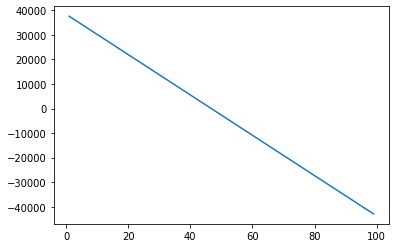

In [57]:
plt.plot(new_input, yhat)
plt.show()

**Conclusiones**

**Toma de decisiones**


Ahora que hemos visualizado los diferentes modelos y generado los valores R-cuadrado y MSE para los ajustes,¿cómo determinamos un buen ajuste del modelo?

¿Cuál es un buen valor de R-cuadrado?

> Al comparar modelos, el modelo con el valor R cuadrado más alto se ajusta mejor a los datos.

¿Qué es una buena MSE?

> Al comparar modelos, el modelo con el valor MSE más pequeño se ajusta mejor a los datos.

En conclusión, comparando estos tres modelos, podemos ver que el modelo MLR es el mejor modelo para poder predecir el precio a partir de nuestro conjunto de datos.El valor de R-cuadrado en combinación con el MSE muestra que MLR parece ser el mejor ajuste del modelo en este caso en comparación con SLR, por otro lado, podemos ver que el MSE para MLR es más pequeño que el MSE para Polynomial Fit y el el R-cuadrado para el MLR también es mucho mayor que para el Ajuste polinomial.